In [ ]:
# prompt: connect to gdrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(cluster_model, annotation_fontsize=4, **kwargs):
    # Create linkage matrix
    counts = np.zeros(cluster_model.children_.shape[0])
    n_samples = len(cluster_model.labels_)
    for i, merge in enumerate(cluster_model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cluster_model.children_, cluster_model.distances_, counts]
    ).astype(float)

    # Plot dendrogram and capture its return value
    ddata = dendrogram(linkage_matrix, **kwargs)
    ax = plt.gca()
    # Adjust font size of distance annotations
    ax.tick_params(axis='x', which='major', labelsize=8)

    return ddata
def cluster_dendro(weights):
    # setting distance_threshold=0 ensures we compute the full tree.
    cluster_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

    cluster_model = cluster_model.fit(weights)
    plt.title("Hierarchical Clustering Dendrogram")
    # plot the top three levels of the dendrogram
    plot_dendrogram(cluster_model, truncate_mode="level", p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()


In [ ]:
def normalize_blocks(data, block_size=41, epsilon=1e-8):
        normalized_data = data.copy()  # To avoid modifying the original array
        for i in range(0, normalized_data.shape[0], block_size):
            block = normalized_data[i:i+block_size]
            # Compute mean and std per feature over samples (axis 0) and time steps (axis 2)
            mean = block.mean(axis=(0,2), keepdims=True)
            std = block.std(axis=(0, 2), keepdims=True)
            # Normalize the block and handle division by zero by adding epsilon
            normalized_block = (block - mean) / (std + epsilon)
            normalized_data[i:i+block_size] = normalized_block
        return normalized_data


**Note: Genre labels -  Metal:0,   Classical: 1, Rock: 2, Blues: 3, Country: 4, Disco: 5, Hiphop: 6, Reggae: 7, Pop:8, Jazz:9**

(492, 10, 2105)
(246, 10, 2105)
(492,)
(246,)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_3 (TimeDistributed) │ (None, 7, 128)              │         269,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,442 (1.54 MB)

 Trainable params: 402,442 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2765 - loss: 3.6622
Test accuracy: 0.3008


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


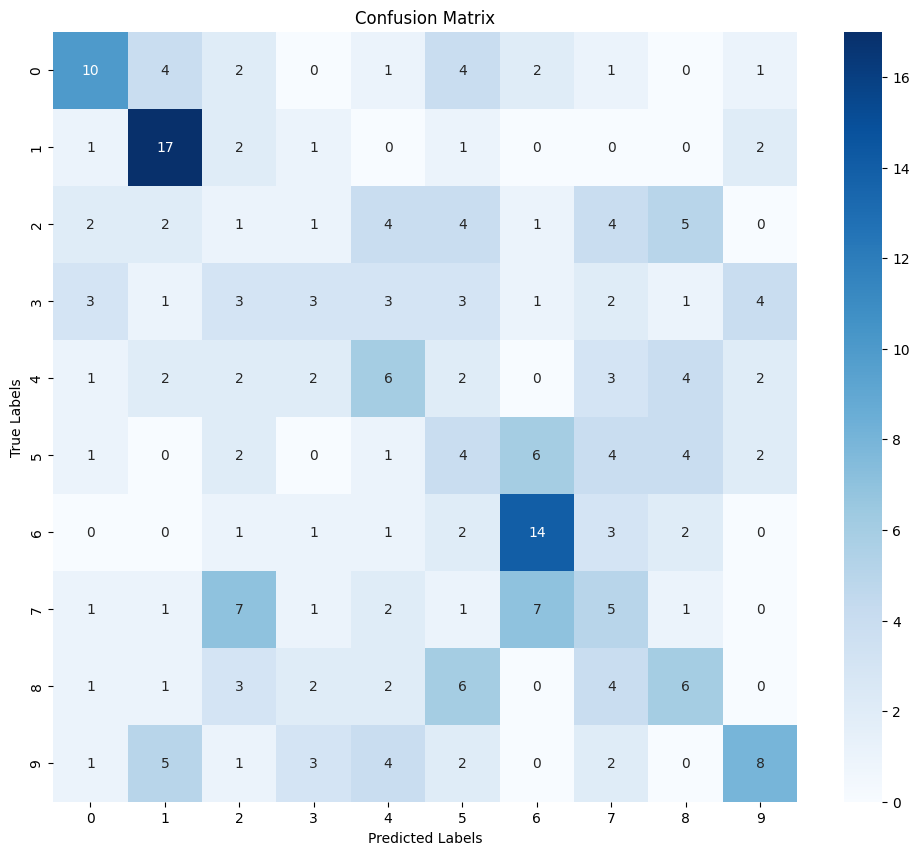

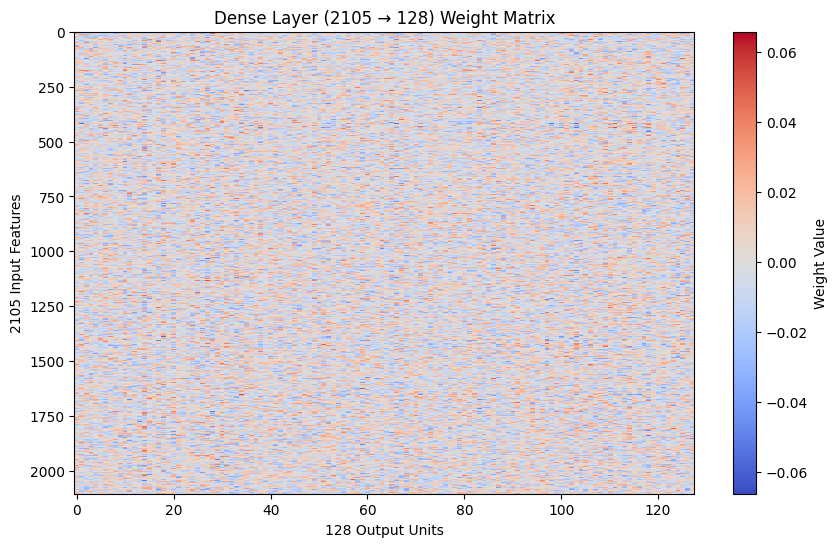

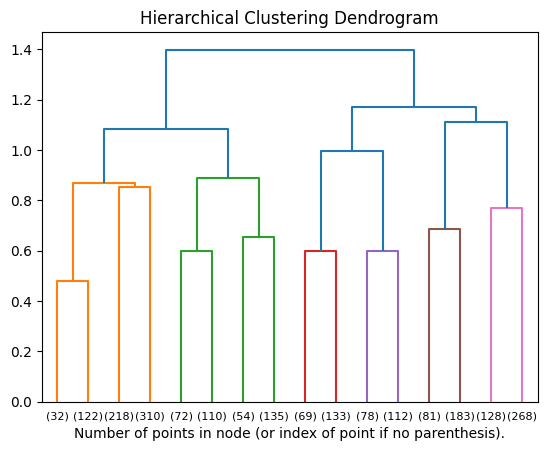

(492, 10, 2105)
(246, 10, 2105)
(492,)
(246,)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_4 (TimeDistributed) │ (None, 7, 128)              │         269,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,442 (1.54 MB)

 Trainable params: 402,442 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2981 - loss: 3.5633
Test accuracy: 0.3089
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


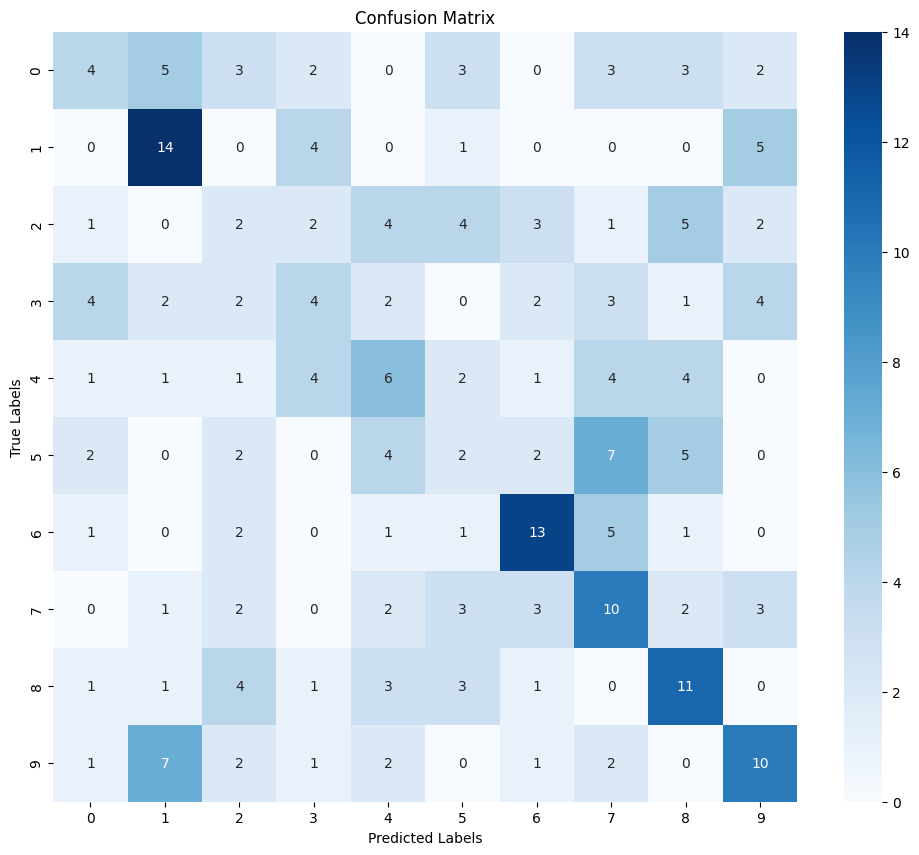

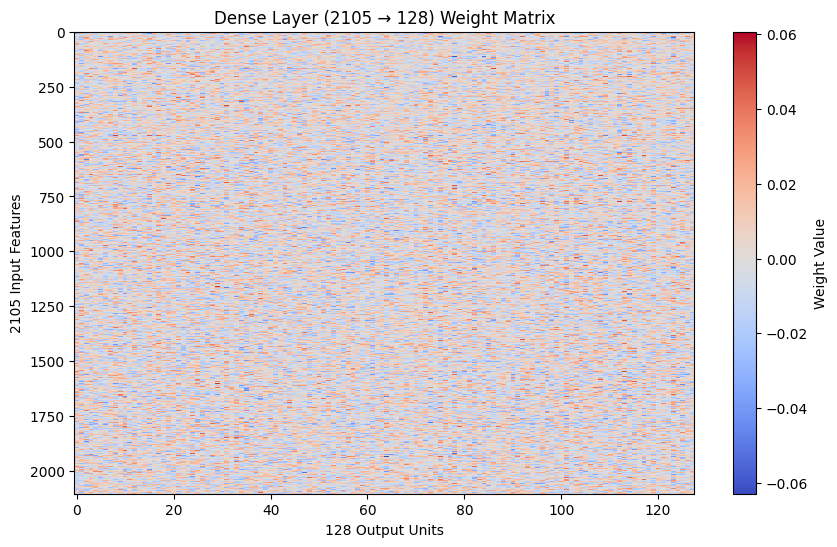

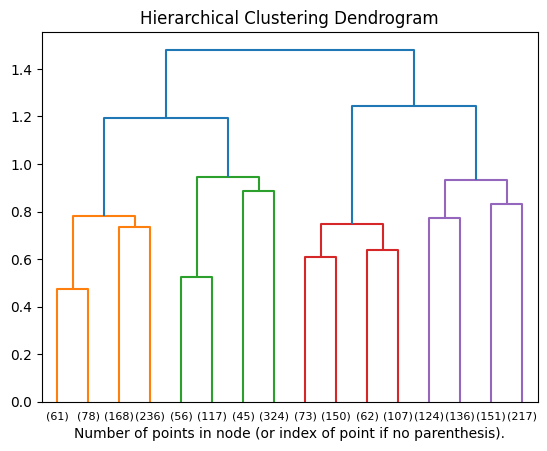

(492, 10, 2105)
(246, 10, 2105)
(492,)
(246,)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_5 (TimeDistributed) │ (None, 7, 128)              │         269,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,442 (1.54 MB)

 Trainable params: 402,442 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2827 - loss: 3.7138
Test accuracy: 0.2967
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


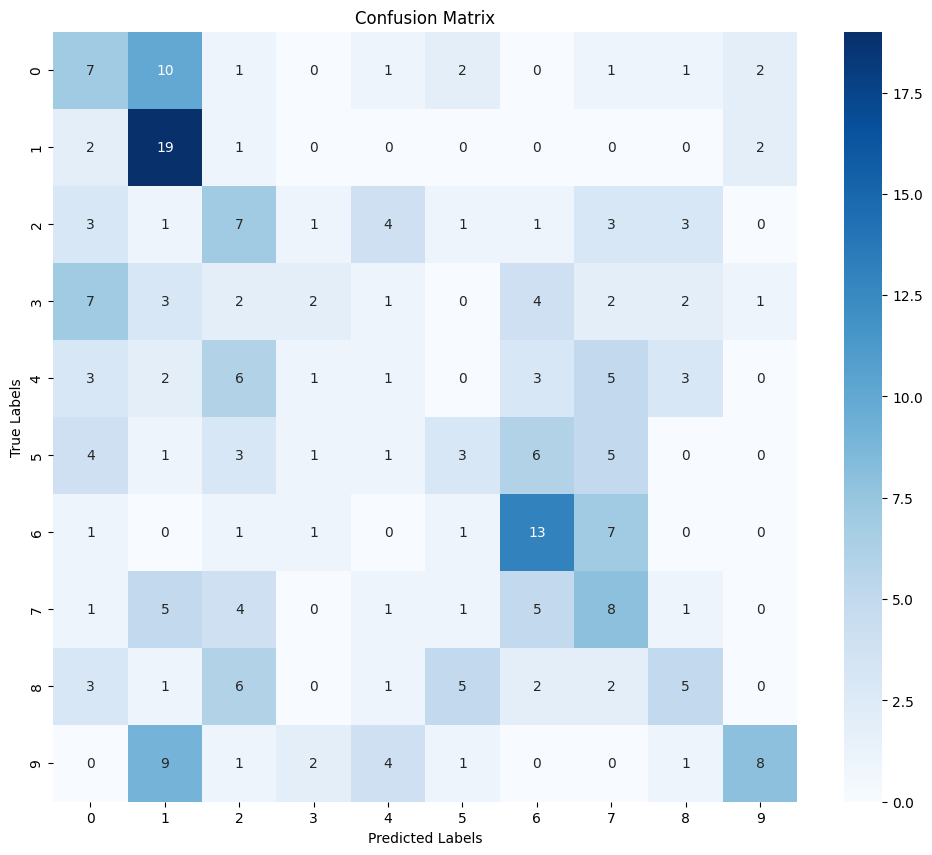

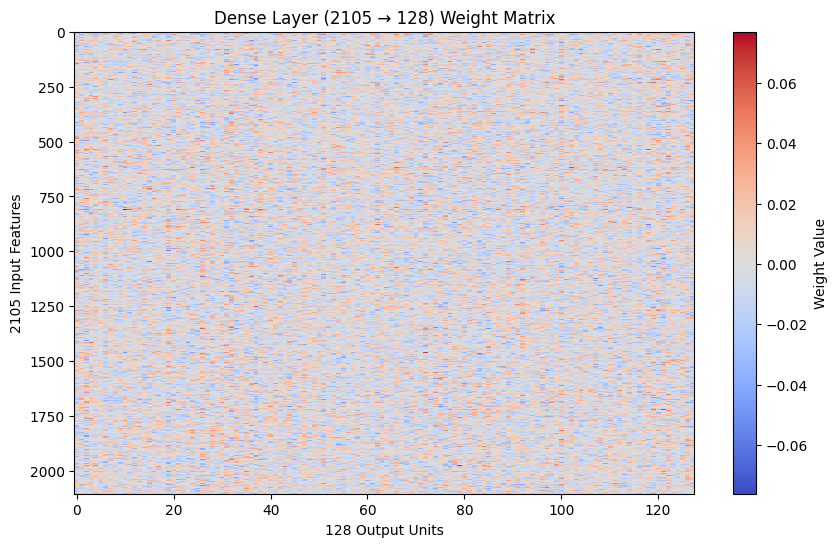

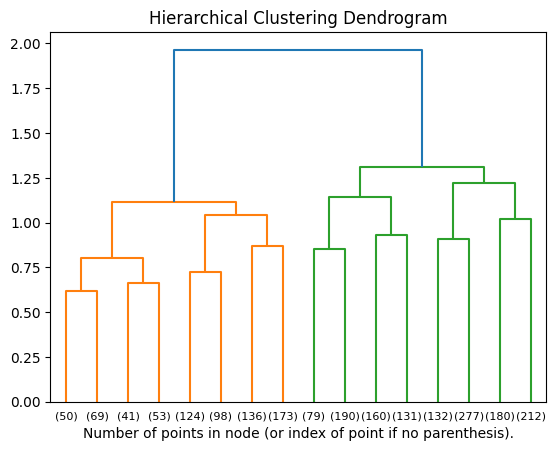

(492, 10, 2105)
(246, 10, 2105)
(492,)
(246,)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_6 (TimeDistributed) │ (None, 7, 128)              │         269,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,442 (1.54 MB)

 Trainable params: 402,442 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2359 - loss: 4.0003
Test accuracy: 0.2480
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


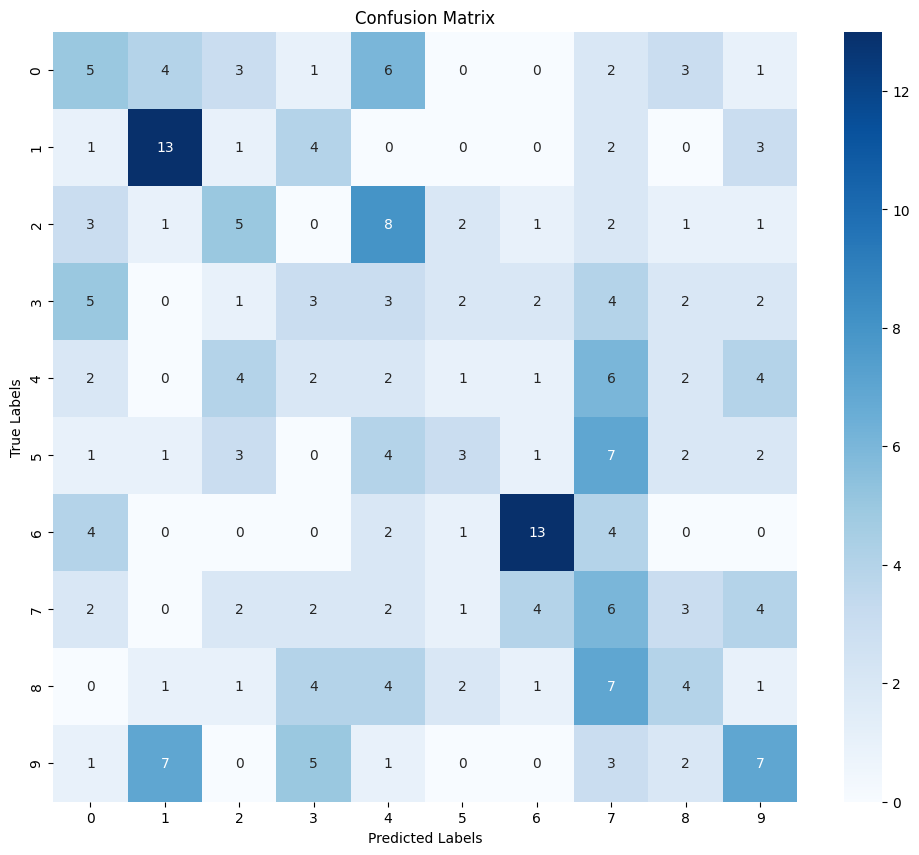

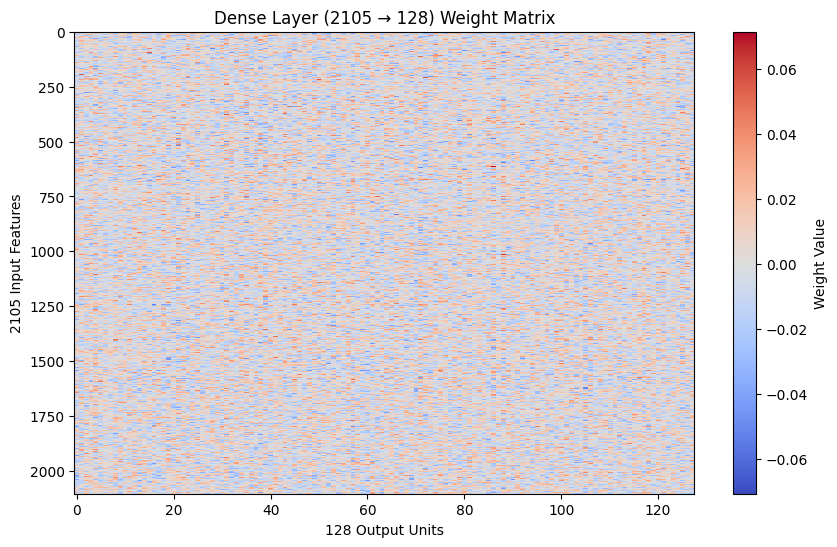

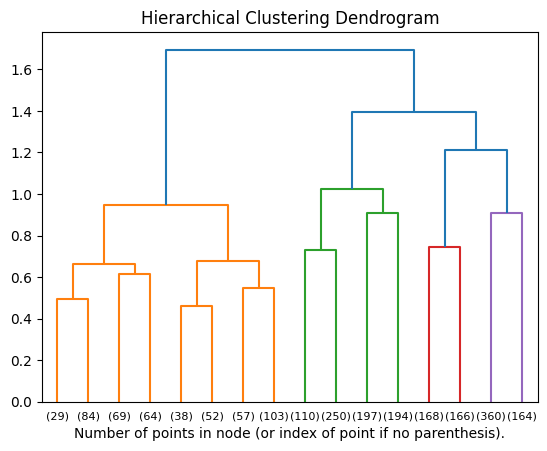

(492, 10, 2105)
(246, 10, 2105)
(492,)
(246,)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_7 (TimeDistributed) │ (None, 7, 128)              │         269,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,442 (1.54 MB)

 Trainable params: 402,442 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3524 - loss: 3.4570
Test accuracy: 0.3455
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


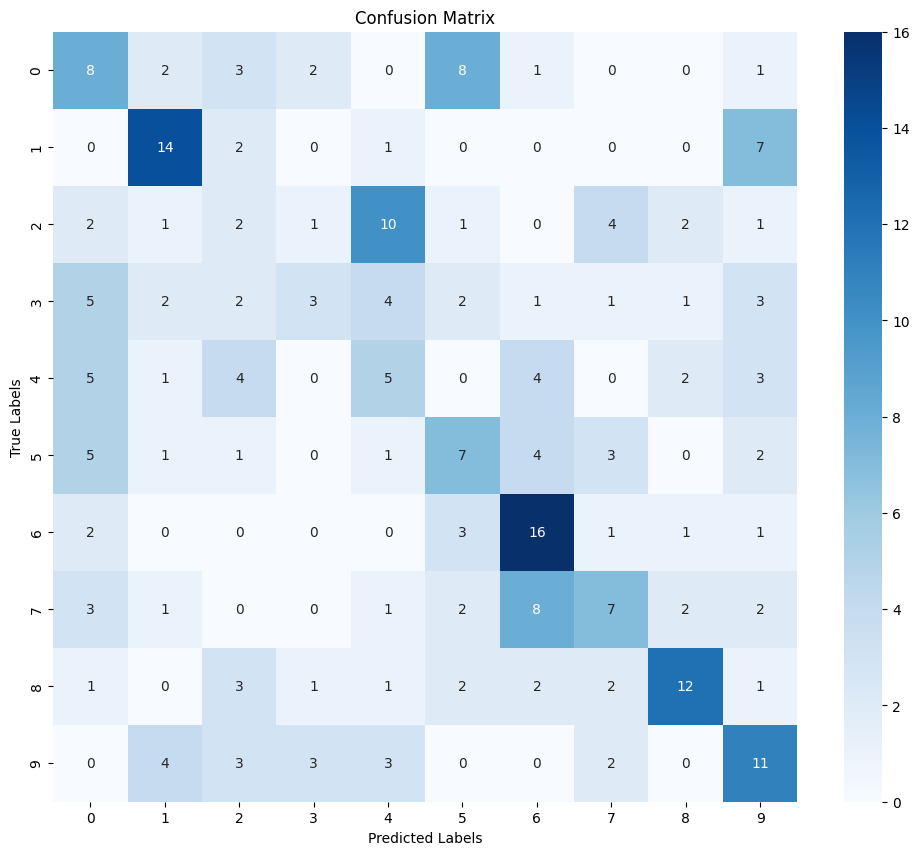

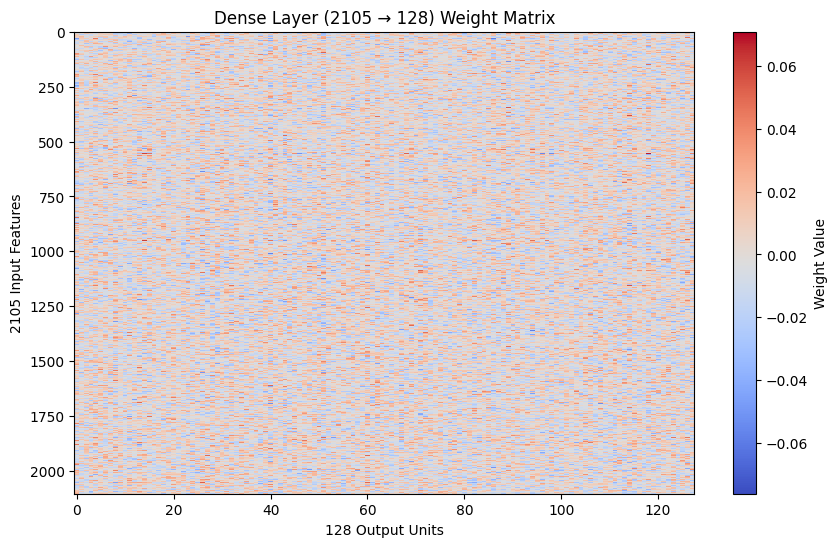

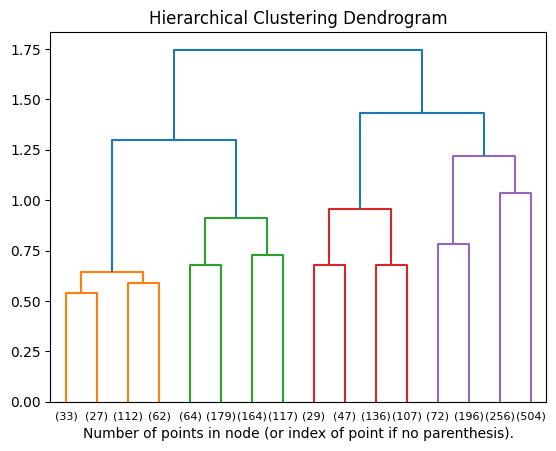

The mean accuracy is 0.3
The standard deviation is 0.03121358286728191


In [ ]:
# Clipped out first two observations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, GRU, Input
import numpy as np
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
import random
import tensorflow as tf
import seaborn as sns
accuracies = []
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

for subject_index in range(5):
      trainX = np.load(f'/content/drive/MyDrive/SOCR_fmri_spatiotemporal_feature/trainX/trainX_subj{subject_index+1}.npy')

    # Assuming trainX and testX are NumPy arrays of shapes (492, 2105, 10) and (246, 2105, 10)
      trainX = normalize_blocks(trainX)
      trainX = np.transpose(trainX,(0,2,1))

      print(trainX.shape)
      testX = np.load(f'/content/drive/MyDrive/SOCR_fmri_spatiotemporal_feature/testX/testX_subj{subject_index+1}.npy')
      testX = normalize_blocks(testX)
      testX = np.transpose(testX,(0,2,1))
      print(testX.shape)
      trainY = np.load(f'/content/drive/MyDrive/SOCR_fmri_spatiotemporal_feature/trainY/trainY_subj{subject_index+1}.npy')
      print(trainY.shape)
      testY = np.load(f'/content/drive/MyDrive/SOCR_fmri_spatiotemporal_feature/testY/testY_subj{subject_index+1}.npy')
      print(testY.shape)

      model = Sequential()
      model.add(Input(shape=(7,2105)))
      #model.add(TimeDistributed(Dense(64, kernel_regularizer=regularizers.l2(0.01))))
      model.add(TimeDistributed(Dense(128, kernel_regularizer=regularizers.l2(0.01))))

      model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=regularizers.l2(0.01)))  # Input shape (timesteps, features)
      model.add(Dropout(0.5))                      # Regularization
      model.add(Dense(10, activation='softmax'))   # Output layer for 10 classes
      model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
      model.summary()
      history = model.fit(trainX[:,3:,:], trainY,
                          epochs=20,
                          batch_size=32,
                          validation_split=0.2,verbose=0)  # Using 20% of training data for validation
      test_loss, test_acc = model.evaluate(testX[:,3:,:], testY)
      print(f'Test accuracy: {test_acc:.4f}')
      accuracies.append(test_acc)
      import matplotlib.pyplot as plt
      testX_sliced = testX[:,3:,:]  # Use same slicing as in evaluate()
      predicted_probs = model.predict(testX_sliced)
      predicted_classes = np.argmax(predicted_probs, axis=1)

      # Compute confusion matrix
      cm = confusion_matrix(testY, predicted_classes)

      # Plot confusion matrix
      plt.figure(figsize=(12, 10))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                  xticklabels=np.arange(10),
                  yticklabels=np.arange(10))
      plt.xlabel('Predicted Labels')
      plt.ylabel('True Labels')
      plt.title('Confusion Matrix')
      plt.show()

      # Get the TimeDistributed Dense layer (index 1 in model.layers)
      dense_layer = model.layers[0]
      weights = dense_layer.get_weights()[0]
      plt.figure(figsize=(10, 6))
      plt.imshow(weights, aspect='auto', cmap='coolwarm', interpolation='nearest')
      plt.colorbar(label='Weight Value')
      plt.title('Dense Layer (2105 → 128) Weight Matrix')
      plt.xlabel('128 Output Units')
      plt.ylabel('2105 Input Features')
      plt.show()
      cluster_dendro(weights)
print(f"The mean accuracy is {np.mean(accuracies)}")
print(f"The standard deviation is {np.std(accuracies)}")